Populating the interactive namespace from numpy and matplotlib
Ni_orbs =  ['d3z2r2', 'dx2y2', 'dxy', 'dxz', 'dyz']
O1_orbs =  ['px']
O2_orbs =  ['py']
compute A(w) for symmetries =  ['1A1', '1B1', '3B1', '1A2', '3A2', '1E', '3E']


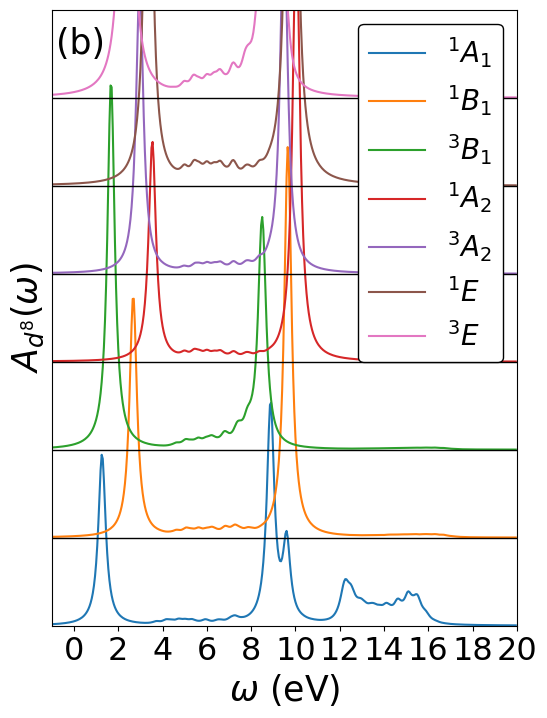

In [1]:
%pylab inline

import math
import numpy as np
from scipy.sparse.linalg import inv
#from numpy.linalg import inv
import scipy.sparse as sps
import scipy.sparse.linalg
import sys
import matplotlib.pyplot as plt
from scipy import interpolate
sys.path.append('../../src/')
from pylab import *

import parameters as pam
import lattice as lat
import variational_space as vs
import hamiltonian as ham
import basis_change as basis
import lanczos

ed = 0
#eps = np.arange(7, 7.51, 1.0) #[3.5]#,3.5,4.5]
ep_avgs = np.arange(7.0, 7.01, 0.1) 
ep_difs = np.arange(0.0, 0.051, 0.01) 

As = np.arange(6.0, 6.01, 0.1)
B = 0.15
C = 0.58
#As = np.arange(100, 100.1, 1.0)
#B = 0
#C = 0

Norb = 7

if Norb<=8:
    tpp = 0.55
    tpd = 1.5
else:
    # for N3 usage only:
    tpp = 0.55
    tpd = 1.5
    
    pds = 1.5
    pdp = 0.75
    #pds = 0.00001
    #pdp = 0.00001
    pps = 0.9
    ppp = 0.2

Upp = 0
Vpp = 0
Mc = 10
eta = 0.2
symmetries =['1A1','1B1','3B1','1A2','3A2','1E','3E']
symlabels = ['$^{1}A_1$','$^{1}B_1$','$^{3}B_1$','$^{1}A_2$','$^{3}A_2$','$^{1}E$','$^{3}E$']

Ms = ['-b','-r','-g','-m','-c','-k','-y','--b','--r','--g','--m','--c','--k','--y',\
      '-.b','-.r','-.g','-.m','-.c','-.k','-.y',':b',':r',':g',':m',':c',':k',':y']

mode = '_vs_sym' # '_vs_tpd'
offset = 1

# if Norb<=8:
#     fname = 'epx'+str(epx)+'epy'+str(epy)+'_tpd'+str(tpd)+'_tpp'+str(tpp)+'_Upp'+str(Upp)+'_Vpp'+str(Vpp)+'_Mc'+str(Mc) \
#      +'_Norb'+str(Norb)+'_eta'+str(eta)
# else:
#     fname = 'epx'+str(epx)+'epy'+str(epy)+'_pdp'+str(pdp)+'_pps'+str(pps)+'_ppp'+str(ppp)+'_Upp'+str(Upp)+'_Vpp'+str(Vpp)+\
#     '_Mc'+str(Mc)+'_Norb'+str(Norb)+'_eta'+str(eta)
    
# a = loadtxt('./data_Aw/'+fname+'_cont_bottom.txt',skiprows=0)
# x = [a, a]
# y = [0, 5]

def plot_atomic_multiplet_peaks(E_1S, E_1G, E_1D, E_3P, E_3F, E0):
    yy = [0,7]
    xx = [E0-E_1S,E0-E_1S]
    plt.plot(xx, yy,'--k', linewidth=0.5)
    #text(pam.E_1S-0.2, 10.2, 'E_1S', fontsize=5)
    xx = [E0-E_1G,E0-E_1G]
    plt.plot(xx, yy,'--k', linewidth=0.5)
    #text(pam.E_1G-0.2, 10.5, 'E_1G', fontsize=5)
    xx = [E0-E_1D,E0-E_1D]
    plt.plot(xx, yy,'--k', linewidth=0.5)
    #text(pam.E_1D-0.2, 10.8, 'E_1D', fontsize=5)
    xx = [E0-E_3P,E0-E_3P]
    plt.plot(xx, yy,'--k', linewidth=0.5)
    #text(pam.E_3P-0.2, 11.1, 'E_3P', fontsize=5)
    xx = [E0-E_3F,E0-E_3F]
    plt.plot(xx, yy,'--k', linewidth=0.5)
    #text(pam.E_3F-0.2, 11.4, 'E_3F', fontsize=5)
    
#############################################################################
Nsym = len(symmetries)

plt.figure(figsize=(6,8))

if mode=='_vs_sym':
    for ep1 in pam.ep_avgs: 
        for ep2 in pam.ep_difs:
            clf()
                    
            epx = ep1+ep2
            epy = ep1-ep2
            
            
            for A in As:
                Udd = A+4*B+3*C

                # readin two-hole ground state energy
                if Norb<=8:
                    fname = 'Egs_Norb'+str(Norb)+'_tpp'+str(tpp)+'_B'+str(B)+'_C'+str(C)+'_Upp'+str(Upp)+'_Vpp'+str(Vpp)+\
                            '_Mc'+str(Mc)+'_eta'+str(eta)
                else:
                    fname = 'Egs_Norb'+str(Norb)+'_pps'+str(pps)+'_ppp'+str(ppp)+'_B'+str(B)+'_C'+str(C) \
                            +'_Upp'+str(Upp)+'_Vpp'+str(Vpp)+'_Mc'+str(Mc)+'_eta'+str(eta)

    #             a = loadtxt('../twohole_impurity_model/data_GS/'+fname+'.txt',skiprows=0)
    #             if Norb<=8:
    #                 E0 = a[iep,3]
    #             else:·
    #                 E0 = a[iep,4]
    #             print E0

                for i in range(0,Nsym):
                    sym = symmetries[i]

                    if Norb<=8:
                        fname ='epx'+str(epx)+'epy'+str(epy)+'_tpd'+str(tpd)+'_tpp'+str(tpp)+'_A'+str(A)+'_B'+str(B)+'_C'+str(C) \
                                  +'_Upp'+str(Upp)+'_Vpp'+str(Vpp)+'_Mc'+str(Mc)+'_Norb'+str(Norb)+'_eta'+str(eta)
                    else:
                        fname = 'epx'+str(epx)+'epy'+str(epy)+'_pdp'+str(pdp)+'_pps'+str(pps)+'_ppp'+str(ppp)+'_A'+str(A)+'_B'+str(B) \
                                  +'_C'+str(C)+'_Upp'+str(Upp)+'_Vpp'+str(Vpp)+'_Mc'+str(Mc)+'_Norb'+str(Norb)+'_eta'+str(eta)

                    a = loadtxt('./data_Aw/'+fname+'_'+sym+'.txt',skiprows=1)
#                     if i==0:
#                         l0=list(a[:,0])
#                         l1=list(a[:,1])
#                         maxindex=l1.index(max(l1))
#                         maxw=l0[maxindex]
                       
                        
                    #plot(a[:,0], a[:,1]+i*offset, linewidth=1, label='$t_{pd}=$'+str(tpd)+','+sym)

                    #f = interpolate.interp1d(a[:,0], 10*a[:,1]+i*offset, kind='linear')
                    #f = interpolate.Akima1DInterpolator(a[:,0], 10*a[:,1]+i*offset)
                    #xx = np.arange(-10.0, 20.0, 0.1/4.)
                    #yy = f(xx)
                    #plot(xx,yy, linewidth=1, label=symlabels[i])

                    
                    plot(a[:,0], 5.*a[:,1]+i*offset, linewidth=1.5, label=symlabels[i])

                    # try to smooth only part of the curve
                    xval = []
                    yval = []
                    xtemp = []
                    ytemp = []
                    fp1 = -1.30
                    fp2 = 2.50
                    for j in range(0,len(a)):
                        if a[j,0]<fp1:
                            xval.append(a[j,0])
                            yval.append(10*a[j,1]+i*offset)
                        elif a[j,0]<fp2:
                            xtemp.append(a[j,0])
                            ytemp.append(10*a[j,1]+i*offset)

                    # interpolate the desired interval
                    #f = interpolate.interp1d(xtemp, ytemp, kind='quadratic')
                    #xx = np.arange(fp1, fp2-0.02, 0.2)
                    #yy = f(xx)
                    #for j in range(0,len(xx)):
                    #    xval.append(xx[j])
                    #    yval.append(yy[j])
                    #plot(xval, yval, linewidth=1, label=symlabels[i])

                    if i>0:
                        x1 = [-20, 20]
                        y1 = [i*offset, i*offset]
                        plot(x1, y1, '-k', linewidth=1)

                #plot(x, y, '--r', linewidth=1, label='cont.')

                #if Norb<=8:
                #    title("ep"+str(ep)+'_tpd'+str(tpd)+'_tpp'+str(tpp)+'_A'+str(A)+'_B'+str(B)+'_C'+str(C) \
                #                  +'_Upp'+str(Upp)+'_Mc'+str(Mc)+'_Norb'+str(Norb)+'_eta'+str(eta),fontsize=8.5)
                #else:
                #    title("ep"+str(ep)+'_pdp'+str(pdp)+'_pps'+str(pps)+'_ppp'+str(ppp)+'_A'+str(A)+'_B'+str(B)+'_C'+str(C) \
                #                  +'_Upp'+str(Upp)+'_Mc'+str(Mc)+'_Norb'+str(Norb)+'_eta'+str(eta),fontsize=8.5)
                maxval = max(a[:,1])
                xlim([-1,20])
#                 xlim([-5,1])
#                 xlim([-18,2])
                #if maxval>20:
                #    ylim([0,20])
                #else:
                #    ylim([0,maxval])
                ylim([0,7*offset])
                xlabel('$\omega$ (eV)',fontsize=25)
                ylabel('$A_{d^8}(\omega)$',fontsize=25)
                text(-0.8, 6.5, '(b)', fontsize=25)
                #text(-4.5, 1.5, '$\Delta=9$ eV', fontsize=25)
                #grid('on',linestyle="--", linewidth=0.5, color='black', alpha=0.5)
                legend(loc=1, fontsize=20, framealpha=1.0, edgecolor='black')
#                 xticks([-5,-4,-3,-2,-1,0,1],[-5,-4,-3,-2,-1,0,1])
                xticks([0,2,4,6,8,10,12,14,16,18,20],[0,2,4,6,8,10,12,14,16,18,20])
                xticks(fontsize=23) 
                yticks(fontsize=23) 
                plt.tick_params(axis='y',          # changes apply to the x-axis
                                which='both',      # both major and minor ticks are affected
                                bottom=False,      # ticks along the bottom edge are off
                                top=False,         # ticks along the top edge are off
                                left=False,      # ticks along the bottom edge are off
                                right=False,         # ticks along the top edge are off
                                labelbottom=False) # labels along the bottom edge are off
                plt.yticks([], [])

                #axes().set_aspect('equal')

                if Norb<=8:
                    savefig("Aw"+mode+'_'+'epx'+str(epx)+'epy'+str(epy)+'_tpd'+str(tpd)+'_tpp'+str(tpp)+'_A'+str(A)+'_B'+str(B)+'_C'+str(C) \
                                  +'_Upp'+str(Upp)+'_Vpp'+str(Vpp)+'_Mc'+str(Mc)+'_Norb'+str(Norb)+'_eta'+str(eta)+".pdf")
                else:
                    savefig("Aw"+mode+'epx'+str(epx)+'epy'+str(epy)+'_pdp'+str(pdp)+'_pps'+str(pps)+'_ppp'+str(ppp) \
                                  +'_A'+str(A)+'_B'+str(B)+'_C'+str(C) \
                                  +'_Upp'+str(Upp)+'_Vpp'+str(Vpp)+'_Mc'+str(Mc)+'_Norb'+str(Norb)+'_eta'+str(eta)+".pdf")